In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../input/predict-wine-sales-2022/logit_wine_train.csv")

In [3]:
df.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,1,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,1,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,1,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,1,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,1,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='TARGET', ylabel='count'>

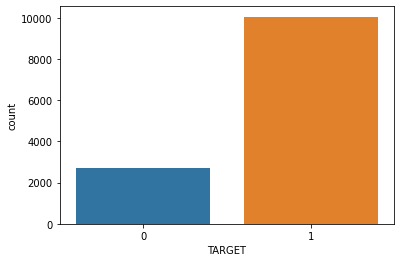

In [4]:
sns.countplot(df["TARGET"], label="Count")

In [5]:
cardinality = [{df[col].name: len(pd.Index(df[col]).value_counts())} for col in df]
print(cardinality)

[{'INDEX': 12795}, {'TARGET': 2}, {'FixedAcidity': 470}, {'VolatileAcidity': 815}, {'CitricAcid': 602}, {'ResidualSugar': 2077}, {'Chlorides': 1663}, {'FreeSulfurDioxide': 999}, {'TotalSulfurDioxide': 1370}, {'Density': 5933}, {'pH': 497}, {'Sulphates': 630}, {'Alcohol': 401}, {'LabelAppeal': 5}, {'AcidIndex': 14}, {'STARS': 4}]


In [6]:
print(set([type_ for type_ in df.dtypes]))

{dtype('float64'), dtype('int64')}


In [7]:
df = df.drop(columns=["INDEX"])

In [8]:
# Clean the data with NaN values
for column in df.loc[:, df.isna().any()]:
    df = df.fillna(df[[column]].mean())

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != "TARGET"], df["TARGET"], stratify=df["TARGET"], random_state=66)


In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.994
Accuracy on test set: 0.838


In [11]:
from sklearn.svm import SVC

svc = SVC(random_state=1)
svc.fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(svc.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(svc.score(X_test, y_test)))

Training set accuracy: 0.786
Test set accuracy: 0.786


In [12]:
wine_features = [x for i,x in enumerate(df.columns) if x != "TARGET"]

In [13]:
def plot_feature_importances(model):
    plt.figure(figsize=(8,6))
    n_features = 14
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), wine_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

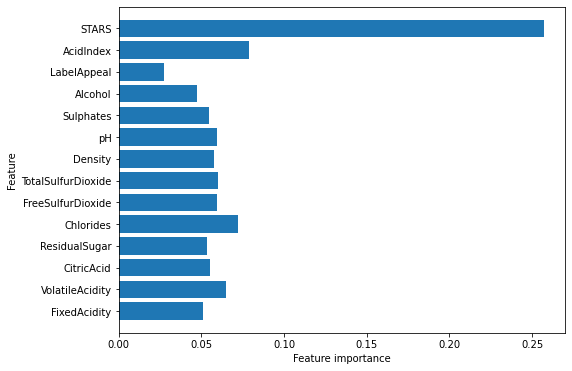

In [14]:
plot_feature_importances(rf)

Text(0, 0.5, 'Churn Probability')

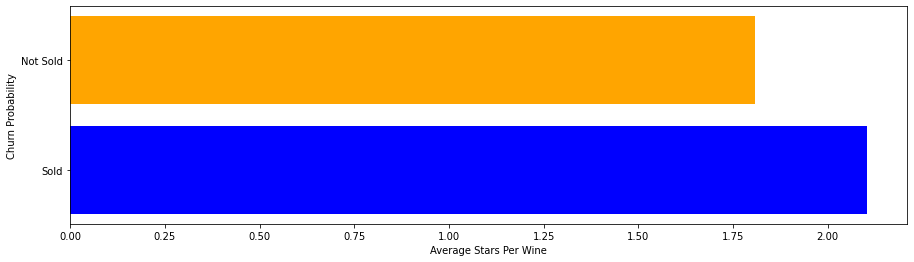

In [15]:
target_1 = df[(df["TARGET"] == 1)]["STARS"].mean()
target_0 = df[(df["TARGET"] == 0)]["STARS"].mean()
plt.figure(figsize=(15,4))
n_features = 2
plt.barh(range(n_features), [target_1, target_0], align="center", color=["blue", "orange"])
plt.yticks(np.arange(n_features), ["Sold", "Not Sold"])
plt.xlabel("Average Stars Per Wine")
plt.ylabel("Churn Probability")

In [16]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != "TARGET"], df["TARGET"], stratify=df["TARGET"], random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)

print("Training set accuracy: {:.3f}".format(pipe.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(pipe.score(X_test, y_test)))

Training set accuracy: 0.801
Test set accuracy: 0.800
